# Predicting the upvote ratio of a joke from its text (1)
We will use this measure as a proxy for how funny a joke is. The first attempt is to use a simple linear regression model.

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import pandas as pd

# Load the dataset
file_path = 'data/reddit_jokes_slim_processed.csv'
jokes_data = pd.read_csv(file_path)
# Combine title and selftext columns
jokes_data['combined_text'] = jokes_data['thread_title'] + " " + jokes_data['thread_selftext']

# Selecting the combined text and the upvote ratio for our analysis
data = jokes_data[['combined_text', 'thread_upvote_ratio']]

# Drop rows with missing values
data = data.dropna()

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(data['combined_text'])
y = data['thread_upvote_ratio']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean esquared error = ',mse)
print("R-squared = ", r2)



Mean esquared error =  0.05484377511195117
R-squared =  -0.0636750493664413


The R-squared value is very low and this indicates which means the model is not a good fit for the data.

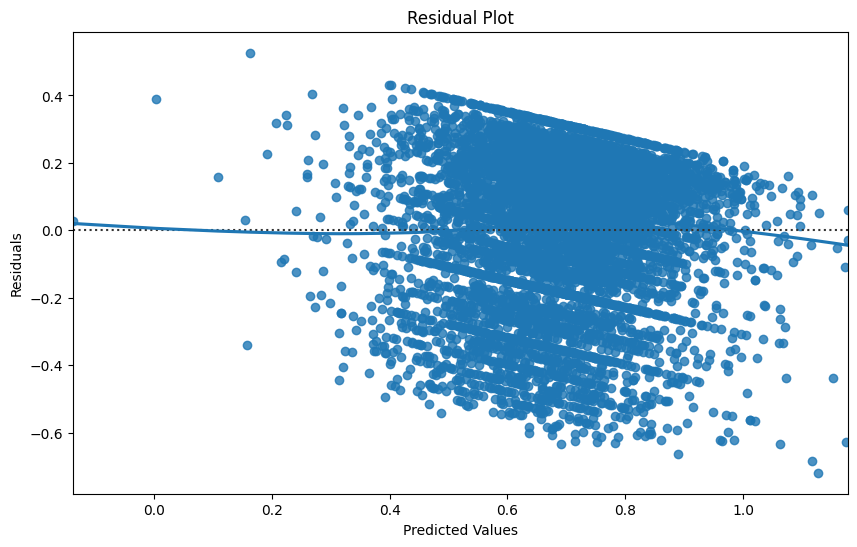

In [2]:

# Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test, lowess=True)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The residue plot above also shows that the model is not a good fit for the data. The points are not randomly scattered around the horizontal axis.

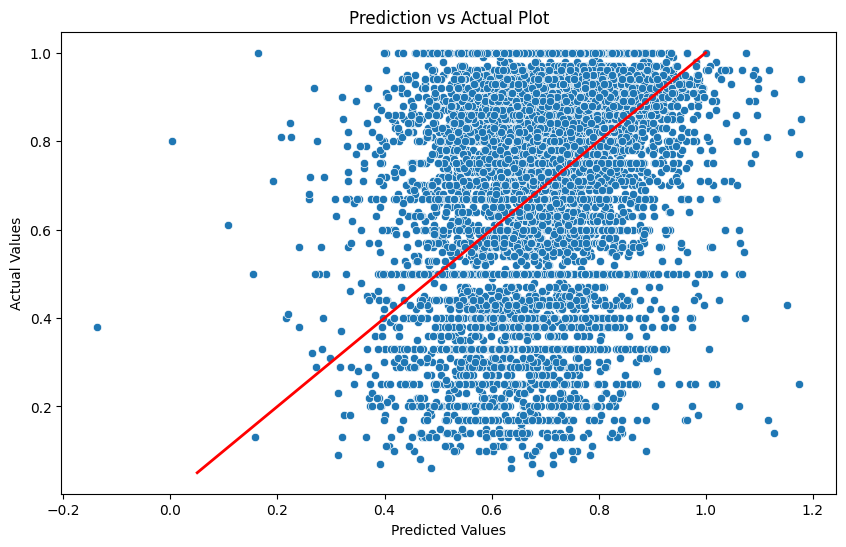

In [3]:
# Prediction vs Actual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Prediction vs Actual Plot')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Reference line
plt.show()


More indication of poor performance is visible in the predicted value vs actual value plot.

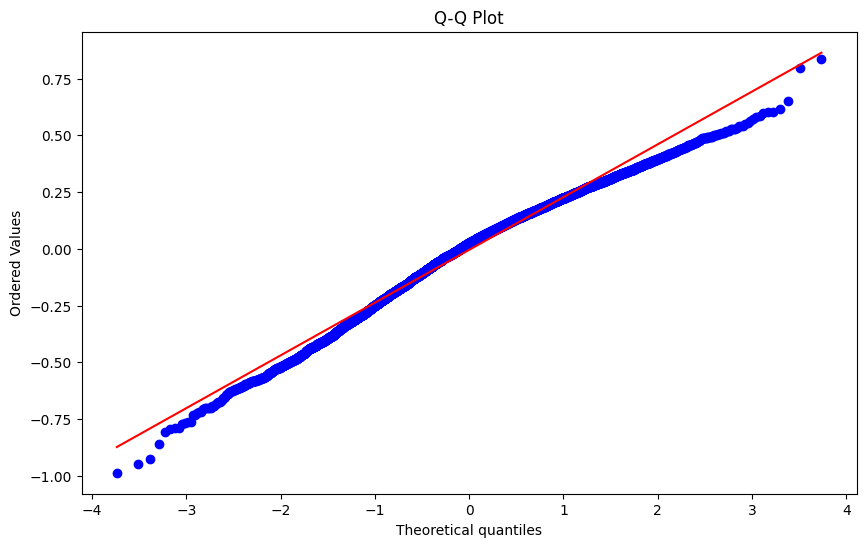

In [4]:
# Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(y_test - y_pred, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

The Q-Q plot shows that the residuals are following the normal distibution around one standard deviatio but as we go further away from the mean, the residuals are not following the normal distribution. This means our linear model wont have good performance for jokes with high and low upvote ratios. Overall, this means linear regression with simple feature transformations, as we expected, won't be adequate for our purpose.